In [19]:
######## .keras file ta offline a hole manualy save korte hobe

# #classification problem

# inputs = Input((28,28))#input layer

# outputs = Dense(number_of_classes, activation = 'softmax')(x) #output layer

# model.compile(loss = 'catagorical crossentropy') #cost function


In [ ]:
# MNIST stands for Modified National Institute of Standards and Technology dataset.
# It is one of the most famous datasets in machine learning and deep learning for image classification.

# Key Points:

# What it contains:
# Handwritten digits 0–9 (10 classes).

# Number of samples:
# 60,000 training images
# 10,000 testing images

# Image size:
# Grayscale images
# Shape: 28 × 28 pixels
# Pixel values range from 0 (black) to 255 (white)

# Why it’s popular:
# Small and easy to use
# Standard benchmark for testing classification algorithms
# Often the first dataset people use when learning neural networks

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8941 - loss: 0.3501 - val_accuracy: 0.9662 - val_loss: 0.1050
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9716 - loss: 0.0937 - val_accuracy: 0.9782 - val_loss: 0.0784
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9809 - loss: 0.0634 - val_accuracy: 0.9778 - val_loss: 0.0761
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9852 - loss: 0.0473 - val_accuracy: 0.9808 - val_loss: 0.0699
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0366 - val_accuracy: 0.9760 - val_loss: 0.0912
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0330 - val_accuracy: 0.9820 - val_loss: 0.0677
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9840 - val_loss: 0.0663
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9937 - loss: 0.0213 - 

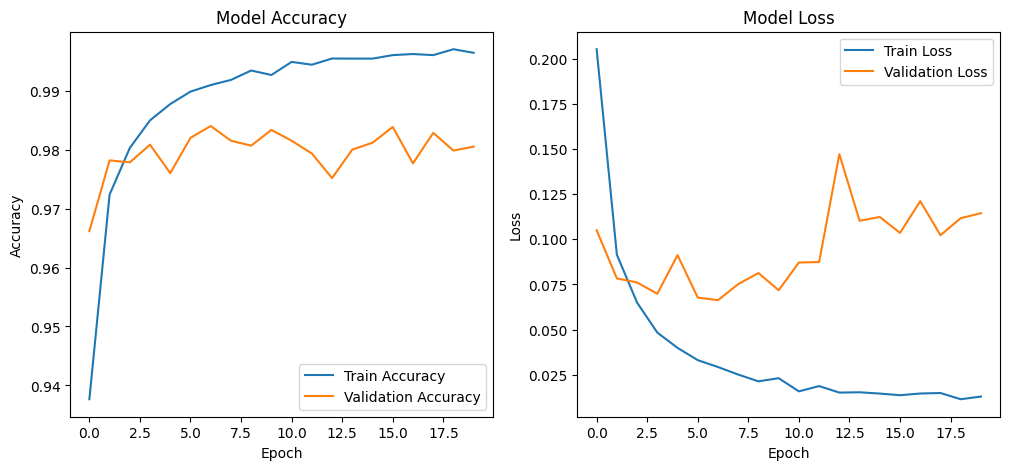

In [8]:
def main():
    number_of_classes = 10
    
    #--- Load MNIST data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Normalize pixel values (0-255 → 0-1)
    x_train = x_train.astype('float32') / 255.0
    x_test  = x_test.astype('float32') / 255.0
    
    # One-hot encode labels
    y_train = to_categorical(y_train, number_of_classes)
    y_test  = to_categorical(y_test, number_of_classes)
    
    #--- Cross-check data
    print("Training data shape:", x_train.shape)
    print("Test data shape:", x_test.shape)

    #--- Build the model
    inputs = Input((28,28))  # input layer
    x = Flatten()(inputs)    # flatten 28x28 → 784
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(number_of_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    #--- Train with 10% validation split
    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

    #--- Evaluate on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nTest Accuracy: {test_acc*100:.2f}%")

    #--- Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

if __name__ == '__main__':
    main()